# Practice Session 04: Weighted Networks


In this session we will reconstruct the World Trade Web using [NetworkX](https://networkx.github.io/), a Python package. This practice is inspired by a paper analysing the Topology of the World Trade Web (https://arxiv.org/abs/cond-mat/0301015).

You will alo be plotting networks and data using [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2012-flows.csv`` international trade in 2012
* ``trade-countries.csv`` list of countries and territories

**Important:** Remember to check you are using version 3.5 of networkx.

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories.

This is a tab-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

In [1]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# Ensure the paths to the files are correct

INPUT_NAMES_FILENAME = "./data/trade-flows/trade-countries.csv"
INPUT_TRADE= "./data/trade-flows/trade-2012-flows.csv"
YEAR = 2012

In [3]:
id2name = {}

In [4]:
with open(INPUT_NAMES_FILENAME, "rt") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for record in reader:
        code = record['code']
        name = record['name']
        id2name[code] = name

Test the mapping using the following code.

In [5]:
# LEAVE AS-IS, it should print "Finland"

print(id2name["FIN"])

Finland


# 2. Read flows data

## 2.1. Create a weighted directed graph

The file `INPUT_TRADE` contains three columns:

* from (country from which the goods or services are exported)
* to (country that receives the goods or services)
* amount (total amount in USD)

Take into account that exports from one country to a second one are the imports of the second one from the first.

Create a NetworkX directed weighted graphs as `g_trade` with 'amount' as the weight of the edges and the nodes named with the country codes.

You can create an empty graph using:

```python
g = nx.DiGraph()
```

By default the columns read by a DictReader are string, but you can convert the column containing the amount exported to a floating point number by using `float()`. Divide the `amount` by one million and round to the nearest integer (you can use the function `round()`), so the weights will be expressed in millions of dollars. Make sure to include only positive values.

**Important:** create only the nodes corresponding to countries listed in ``INPUT_NAMES_FILENAME`` (keys in ``id2name``)

In [6]:
g_trade = nx.DiGraph()
with open(INPUT_TRADE, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for row in reader:
        frm = row['from']
        to = row['to']
        amount = round(float(row['amount'])/1000000)
        if amount > 0: #check >0
            if frm in id2name and to in id2name:
                print(frm, to, amount)
                g_trade.add_edge(frm, to, weight = amount)
                print("edge added!")


AUS AUT 71
edge added!
AUS BEL 1434
edge added!
AUS CAN 1374
edge added!
AUS CHE 686
edge added!
AUS CHL 450
edge added!
AUS CZE 109
edge added!
AUS DEU 1679
edge added!
AUS DNK 150
edge added!
AUS ESP 487
edge added!
AUS EST 8
edge added!
AUS FIN 124
edge added!
AUS FRA 920
edge added!
AUS GBR 6621
edge added!
AUS GRC 27
edge added!
AUS HUN 12
edge added!
AUS IRL 80
edge added!
AUS ISL 4
edge added!
AUS ISR 219
edge added!
AUS ITA 806
edge added!
AUS JPN 36641
edge added!
AUS LUX 2
edge added!
AUS MEX 879
edge added!
AUS NLD 2490
edge added!
AUS NOR 53
edge added!
AUS NZL 7403
edge added!
AUS POL 65
edge added!
AUS PRT 9
edge added!
AUS SVK 3
edge added!
AUS SVN 8
edge added!
AUS SWE 357
edge added!
AUS TUR 686
edge added!
AUS USA 7916
edge added!
AUT AUS 969
edge added!
AUT BEL 2276
edge added!
AUT CAN 1030
edge added!
AUT CHE 8730
edge added!
AUT CHL 189
edge added!
AUT CZE 5715
edge added!
AUT DEU 49379
edge added!
AUT DNK 873
edge added!
AUT ESP 2413
edge added!
AUT EST 152
edge a

In [7]:
# LEAVE AS IS

print("The {:d} graph contains {:d} nodes and {:d} edges with a total weight of {:,d} million USD".format(YEAR, g_trade.number_of_nodes(),g_trade.size(),sum(d.get("weight", 0) for u, v, d in g_trade.edges(data=True))))

The 2012 graph contains 33 nodes and 1049 edges with a total weight of 6,616,535 million USD


This code should have printed:

```
The 2012 graph contains 33 nodes and 1049 edges with a total weight of 6,616,535 million USD
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

In [8]:
print(id2name)

{'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CZE': 'Czech Republic', 'DEU': 'Germany', 'DNK': 'Denmark', 'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway', 'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovak Republic', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'Türkiye', 'USA': 'United States'}


In [9]:
# LEAVE AS-IS

for exporter in ["GBR","AUS", "USA",]:
    for importer in ["GBR","AUS", "USA",]:
      if importer!= exporter:
          print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services worth {:,d} million USD".format(
              YEAR, exporter, id2name[exporter], importer, id2name[importer],
                g_trade.get_edge_data(exporter, importer)["weight"]) )

          print("")


In 2012, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 7,022 million USD

In 2012, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,245 million USD

In 2012, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 6,621 million USD

In 2012, AUS (Australia) exported to USA (United States) goods and services worth 7,916 million USD

In 2012, USA (United States) exported to GBR (United Kingdom) goods and services worth 54,810 million USD

In 2012, USA (United States) exported to AUS (Australia) goods and services worth 31,192 million USD



It should have printed:

```
In 2012, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 7,022 million USD

In 2012, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,245 million USD

In 2012, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 6,621 million USD

In 2012, AUS (Australia) exported to USA (United States) goods and services worth 7,916 million USD

In 2012, USA (United States) exported to GBR (United Kingdom) goods and services worth 54,810 million USD

In 2012, USA (United States) exported to AUS (Australia) goods and services worth 31,192 million USD

```

## 2.2. Compute totals

Next, compute the total exports of each country, into a dictionary: `exports`, with keys being country codes, and values being total exports. Do the same with total imports, into the variable `imports`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)`. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".



In [10]:
def sum_weights(graph, direction, weight_key="weight"):
    dic = dict([(n, 0) for n in graph.nodes()])
    
    for n in graph.nodes():
        if direction == "out":
            # total exports - edges going out of n
            total = sum(graph[n][nbr][weight_key] for nbr in graph.successors(n))
        elif direction == "in":
            # total imports - edges coming into n
            total = sum(graph[pred][n][weight_key] for pred in graph.predecessors(n))
        else:
            raise ValueError("direction must be 'in' or 'out'")
        
        dic[n] = total
    
    return dic


# compute total exports and imports
exports = sum_weights(g_trade, "out")
imports = sum_weights(g_trade, "in")


In [11]:
# LEAVE AS-IS

for country in ['GBR', 'AUS', 'USA']:
    print("In {:d} {:s} exported goods and services worth {:,d} Million USD ,and imported goods and services worth {:,d} Million USD \n for a total trade balance of {:,d} Million USD.".format(
    YEAR, id2name[country], exports[country], imports[country], exports[country]-imports[country]
    ))
    print()

In 2012 United Kingdom exported goods and services worth 325,378 Million USD ,and imported goods and services worth 499,703 Million USD 
 for a total trade balance of -174,325 Million USD.

In 2012 Australia exported goods and services worth 71,773 Million USD ,and imported goods and services worth 108,802 Million USD 
 for a total trade balance of -37,029 Million USD.

In 2012 United States exported goods and services worth 951,452 Million USD ,and imported goods and services worth 1,205,552 Million USD 
 for a total trade balance of -254,100 Million USD.



It should print:

```
In 2012 United Kingdom exported goods and services worth 325,378 Million USD ,and imported goods and services worth 499,703 Million USD
 for a total trade balance of -174,325 Million USD.

In 2012 Australia exported goods and services worth 71,773 Million USD ,and imported goods and services worth 108,802 Million USD
 for a total trade balance of -37,029 Million USD.

In 2012 United States exported goods and services worth 951,452 Million USD ,and imported goods and services worth 1,205,552 Million USD
 for a total trade balance of -254,100 Million USD.
```

# 3. Draw the trade graph

Draw a directed graph using NetworkX with the following characteristics.

* Node size proportional to total imports.
* Directed links in the direction of net trade. Colour proportional to net trade. To avoid clutter represent only the links with a weight > 5000
* Use a spring model layout.
* Make sure arrow heads are visible.

You can use the following Networkx functions:

* `nx.spring_layout(g, iterations=100, weight=, k=)`
* `positions = nx.draw_networkx_nodes(g, positions, node_color=,node_size=)`
* `nx.draw_networkx_edges(g, positions, edgelist=, width=, edge_color=, arrows=True, min_source_margin=0, min_target_margin=)`
* `nx.draw_networkx_labels(g, positions, font_color=)`

You can define the scale and create a colormap using the following functions
* `norm = LogNorm(vmin=min_val, vmax=max_val)`
* `cmap = cm.plasma`

Tune the parameter k and the size of the nodes to avoid overlap. Higher values of k will result

Tip: a good value for the min_target_margin attribute in nx.draw_networkx_edges is $\sqrt(node\_size/\pi)$ where node_size is the same value as in the nx.draw_networkx_nodes() attribute

Tip: remember to import cm from matplotlib and LogNorm from matplotlib.colors

Tip: Be careful with the size of the node, if it is too big the graph will not be readable try small multipliers if this happens.


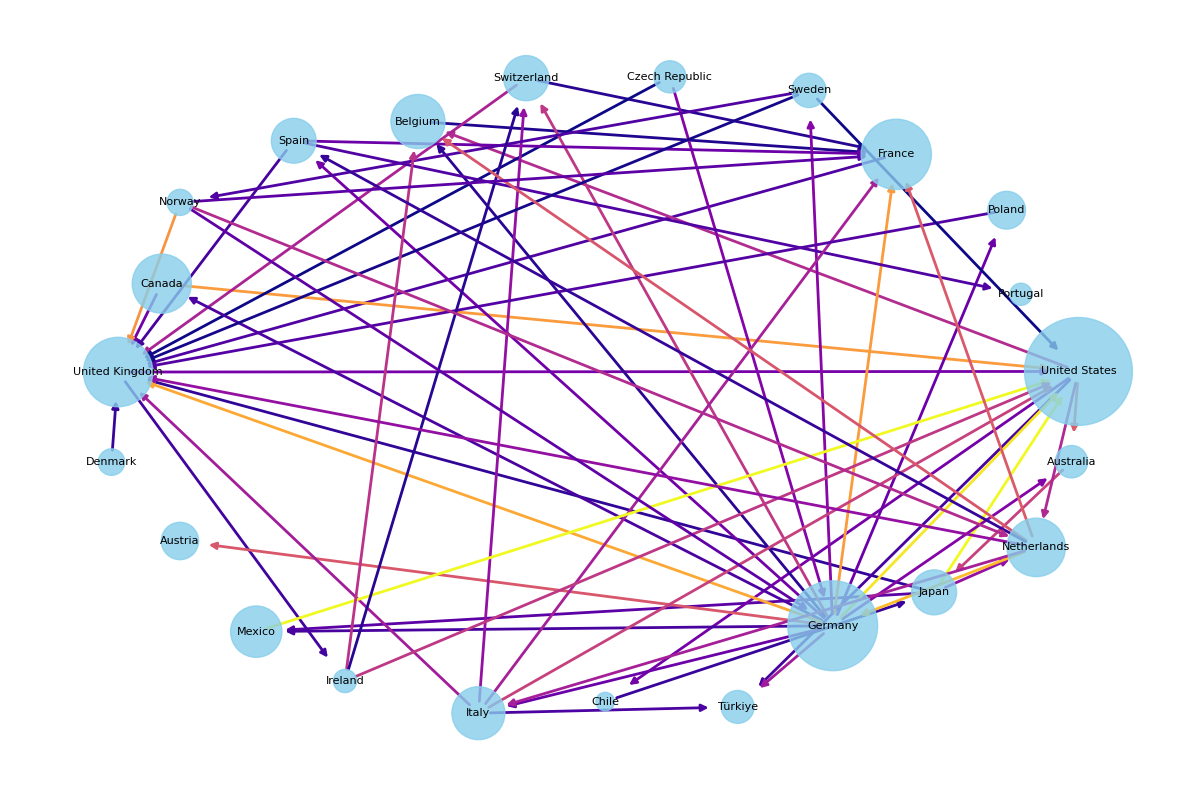

In [12]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import LogNorm

# new edges w + net trade only
net_trade_edges = []
for u, v, data in g_trade.edges(data=True):
    weight_uv = data["weight"]
    weight_vu = g_trade[v][u]["weight"] if g_trade.has_edge(v, u) else 0
    net = weight_uv - weight_vu
    if net > 5000:  # only positive edges above threshold
        net_trade_edges.append((u, v, net))

g_net = nx.DiGraph()
g_net.add_weighted_edges_from(net_trade_edges)

# node sizes proportional to imports
node_sizes = [imports[n] / 200 for n in g_net.nodes()]  # adjust scaling

# edge colors proportional to net trade
net_weights = [d["weight"] for u, v, d in g_net.edges(data=True)]
norm = LogNorm(vmin=min(net_weights), vmax=max(net_weights))
cmap = cm.plasma
edge_colors = [cmap(norm(d["weight"])) for u, v, d in g_net.edges(data=True)]

min_target_margin_value = np.sqrt(np.mean(node_sizes) / np.pi)

pos = nx.spring_layout(g_net, iterations=100, weight="weight", k=160)

plt.figure(figsize=(12, 8))

# nodes
nx.draw_networkx_nodes(
    g_net, pos,
    node_color="skyblue",
    alpha=0.8,
    node_size=node_sizes
)

# edges
nx.draw_networkx_edges(
    g_net, pos,
    width=2,
    edge_color=edge_colors,
    arrows=True,
    min_source_margin=0,
    min_target_margin=min_target_margin_value
)

# labels
filtered_labels = {n: id2name[n] for n in g_net.nodes() if n in id2name}
nx.draw_networkx_labels(
    g_net, pos,
    labels=filtered_labels,
    font_color="black",
    font_size=8
)

# legend

plt.axis("off")
plt.tight_layout()
plt.show()


Replace this cell with a brief commentary on the different features of these plots such as major trading countries by export volume, and some of the biggest net trade values.

Some of the biggest players in the trade network by export volume are the USA, Germany, France, the UK, and the Netherlands. Some of the biggest players net trade values coincide with the brightest colors and are USA-Germany, USA-Mexico, USA-Japan and Germany-Netherlands. Germany, the UK and the US are very central and form a sort of triangle. They all trade with many countries.

# 4. Comparison of export and import scores

Now, we will compare the imports and exports of different countries.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*. **Do not forget to filter out cases where values of *a* or *b* are 0**:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Plot the imports on the x axis and the imports in the y axis.

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.


In [13]:
import matplotlib.pyplot as plt

def plot_scatter(a, b, xlabel, ylabel, figsize=(20,10)):
    # filter zero values
    filtered_keys = [k for k in set(a.keys()).intersection(set(b.keys())) if a[k] > 0 and b[k] > 0]

    # prep values
    x_vals = [a[k] for k in filtered_keys]
    y_vals = [b[k] for k in filtered_keys]

    # make log-log plot
    plt.figure(figsize=figsize)
    plt.loglog(x_vals, y_vals, 'o', markersize=5)  # scatter points
    plt.xlabel(xlabel, {'size': '22'})
    plt.ylabel(ylabel, {'size': '22'})

    # add diagonal line
    min_val = min(min(x_vals), min(y_vals))
    max_val = max(max(x_vals), max(y_vals))
    plt.plot([min_val, max_val], [min_val, max_val], '-.', lw=2, color='gray')

    # annotate points
    for k in filtered_keys:
        plt.text(a[k], b[k], k, {'size': '12'})

    plt.show()


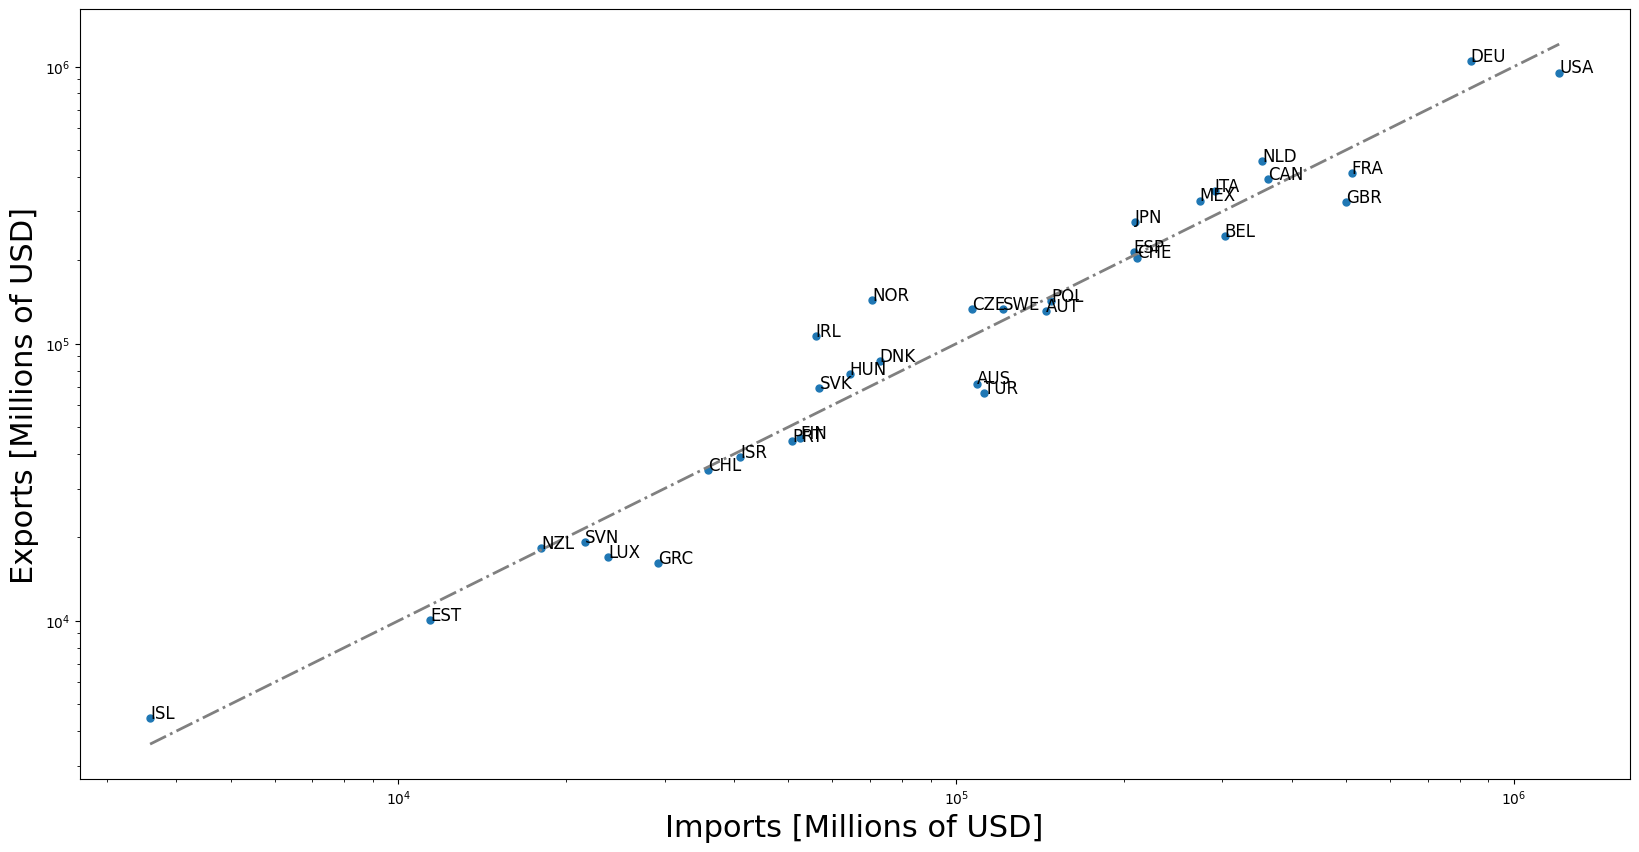

In [14]:
# LEAVE AS-IS: print plots for the newer dataset

plot_scatter(imports, exports, "Imports [Millions of USD]", "Exports [Millions of USD]" )

The scatter plot shows that most countries cluster along the diagonial trendline, which for us means that there's roughly balanced trade taking place, where countries exports are similar to their imports. Any country above the line is exporting more than importing, and vice versa. For example, Norway is a big exporter while Turkey is a big importer. Bigger countries, or rather countries with larger economies end up higher along the line. The Netherlands' economy is impressive for basically being a small swamp compared to other global superpowers. I had no idea they had that degree of cashflow.

# DELIVER (individually)

A .zip file containing:

* This notebook.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>